
## Task 1: Dataset Selection and Preprocessing

### 1. Dataset Selection

**Dataset Chosen:** Titanic: Machine Learning from Disaster

**Source:** [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic/data)

**Description:**
- **Number of Records:** 1,314 (891 training, 418 test)
- **Features:**
  - **PassengerId:** Unique identifier for each passenger
  - **Survived:** Survival status (0 = No, 1 = Yes)
  - **Pclass:** Passenger class (1st, 2nd, 3rd)
  - **Sex:** Gender
  - **Age:** Age in years
  - **SibSp:** Number of siblings/spouses aboard
  - **Parch:** Number of parents/children aboard
  - **Ticket:** Ticket number
  - **Fare:** Passenger fare
  - **Cabin:** Cabin number (many missing)
  - **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Problem Addressed:** Predict the survival of passengers based on the available features.


Data Preprocessing

In [2]:
# a. Import Libraries and Load Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Titanic dataset from a CSV file
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(data_url)

# Check for missing data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handle Missing Data

In [3]:
# Drop 'Cabin' column due to a high number of missing values
data.drop(['Cabin'], axis=1, inplace=True)

# Impute 'Age' with median
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# Impute 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_7636\3779566072.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Data Normalization and Standardization

In [4]:
# Normalize numerical features (Age, Fare)
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


Convert Categorical Data

In [5]:
# One-hot encode categorical variables: Sex, Embarked
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


Feature Selection and Train-Test Split

In [6]:
# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Task 2: Model Design and Implementation

### 1. Model Selection

**Selected Model:** Random Forest Classifier

**Justification:**
Random Forest is a robust, versatile classifier that performs well on both numerical and categorical data and helps reduce overfitting.


Model Implementation

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model with 100 estimators
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Task 3: Model Training and Evaluation

Predictions and Metrics

Accuracy: 0.8156
Precision: 0.7887
Recall: 0.7568
F1 Score: 0.7724


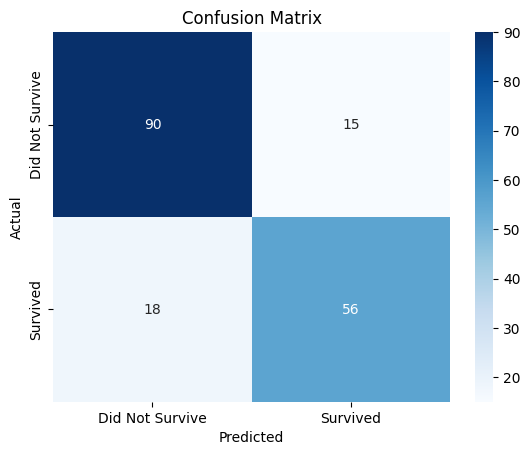

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
